![tile](./cover.png)

# Misión
En está práctica tendrás que elaborar un mapa donde indique los mecanismos focales de un sismos y de sus réplicas principales. 
# Introducción
<img style="float: right; width: 320px" src="focal.png"/> 
Los **mecanismos focales** nos permiten representar gráficamente cuales son las caracterísiticas geométricas de un sismo. Los mecanismos focales se pueden definir a partir de conocer los siguientes parámetros:
1. **Strike** (Rumbo). Es el ángulo que se forma la proyección del plano de falla con la superficie y el norte geográfico.
2. **Dip** (Echado). Es el ángulo que se forma entre el plano horizontal y el plano de falla.
3. **Rake**. Es el ángulo que se forma entre el vector que describe el movimiento de la falla y el rumbo, medido en sentido anti-horario. 
    - **Falla lateral izquierda: ** Rake cercano a 0 (Paralelo a el rumbo).
    - **Falla lateral derecha:   ** Rake cercano a $180˚$ (Anti-paralelo a el rumbo).
    - **Falla Normal: ** Rake cercano a -90˚.
    - **Falla inversal: ** Rake cercano a -90˚.

**Nota. ** Los mecanismos focales poseen de dos planos auxiliares donde solo un de ellos corresponde al plano de falla. No es posible conocer en cual de ellos ocurrió el sismo a partir de los mecanismos focales. Puedes inferirlo a partir del conocimiento previo de la geologeia, tectónica del área.
<img style="float: left; width: 320px" src="focal2.png"/> 

# Parte 1 - Descarga los mecanismos focales
Uno de los catálogos más comunmente es el catálogo <a href="https://www.globalcmt.org/CMTsearch.html">CMT</a>. En este catálogo puedes encontrar los mecánismosfocales para sismos a partir de 1976 hasta la fecha. 
# Instrucciones
1. **Elige un sismo de tu elección** preferentemente de magnitud mayor a **>M7**.
2. Ingresa a la página https://www.globalcmt.org/CMTsearch.html
3. Determina los parámetros de busqueda que consideres convenientes para encontrar el mecanismo focal del sismos y de algunas de su réplicas o precursores. 
4. Realiza la búsqueda correspondiente, utiliza la opción **GMT psvelomeca input**.
5. Copia los resultados en un archivo de texto. Incluye el encabezado (*lon lat depth mrr mtt mpp mrt mrp mtp iexp name* - Sin la palabra *Colums:*), revisa que no tengas líneas en blanco en tu archivo.
6. Guarda tus resultados en un archivo de texto con el nombre **sismos.dat**. Deberás de obtener entre **10 a 100 mecanismos focales**.
A continuación vamos a cargar los datos utilizando una estructura de **DataFrame** de la librería <a href="https://pandas.pydata.org/">Pandas</a>. Esta librería es uso común en muchas aplicaciones de análisis de datos.

In [1]:
# Importa las librerías
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import pandas as pd
import obspy as op
import numpy as np
from obspy.imaging.beachball import beach
from obspy.core.utcdatetime import UTCDateTime

sismos=pd.read_csv("sismos.dat",delim_whitespace=True )
sismos.head(10)

,lon,lat,str1,dip1,rake1,str2,dip2,rake2,sc,iexp,name
0,-94.66,15.38,150,12,-78,318,78,-93,2.824,28,201709080449A
1,-95.09,16.36,152,30,-101,345,60,-84,2.584,24,201709081857A
2,-94.55,15.84,337,43,150,90,70,51,6.594,23,201709090308A
3,-94.18,15.15,296,2,68,138,88,91,5.122,24,201709090454A
4,-94.74,15.69,318,35,98,128,55,84,4.807,23,201709091150A
5,-94.33,15.22,286,18,60,137,75,99,5.752,23,201709091322A
6,-94.86,15.82,261,33,37,139,71,118,0.941,24,201709091530A
7,-94.63,15.75,305,36,98,115,54,84,3.028,23,201709092026A
8,-94.69,15.56,296,15,69,137,76,95,7.599,24,201709100307A
9,-94.54,15.70,169,31,-51,305,67,-111,2.533,23,201709100839A


Nota que las columnas **sc** y **iexp** corresponden al momento de magnitud $M_0$, donde **sc** es la matista y **iexp** es el exponente. Añade una columna al *DataFrame* con la magnitud de momento. Calcula la magnitud **$M_W$** como se indica al final de la página principal de CMT. 

In [3]:
# Escribe tu código aquí. ~2 líneas
Mw = None
None # Agrega una columna a tu DataFrame con los datos de Mw
sismos.head(10)

,lon,lat,str1,dip1,rake1,str2,dip2,rake2,sc,iexp,name,Mw
0,-94.66,15.38,150,12,-78,318,78,-93,2.824,28,201709080449A,8.233910
1,-95.09,16.36,152,30,-101,345,60,-84,2.584,24,201709081857A,5.541528
2,-94.55,15.84,337,43,150,90,70,51,6.594,23,201709090308A,5.146099
3,-94.18,15.15,296,2,68,138,88,91,5.122,24,201709090454A,5.739626
4,-94.74,15.69,318,35,98,128,55,84,4.807,23,201709091150A,5.054583
5,-94.33,15.22,286,18,60,137,75,99,5.752,23,201709091322A,5.106546
6,-94.86,15.82,261,33,37,139,71,118,0.941,24,201709091530A,5.249060
7,-94.63,15.75,305,36,98,115,54,84,3.028,23,201709092026A,4.920771
8,-94.69,15.56,296,15,69,137,76,95,7.599,24,201709100307A,5.853838
9,-94.54,15.70,169,31,-51,305,67,-111,2.533,23,201709100839A,4.869090


# Parte 2 - Creación de un mapa
Si estás corriendo el programa *offline*, necesitarás instalar la librería ***Cartopy***. Las instrucciones para instalarla las puedes encontrar <a href="https://scitools.org.uk/cartopy/docs/latest/installing.html">aquí</a>.<br>
## Instrucciones
1. Define el rango de latitudes y longitudes en el que quieres graficar tu mapa.
2. Crea un figura lo suficientemente grande para graficar tus mecanismos focales. 
3. Descarga de ***Cartory** las imágenes del terreno. 
4. Grafíca las pelotas de playa utilizando las librerías de **Obspy**.
5. Haz los arreglos necesarios a la imagen en caso de que lo consideres necesario. 

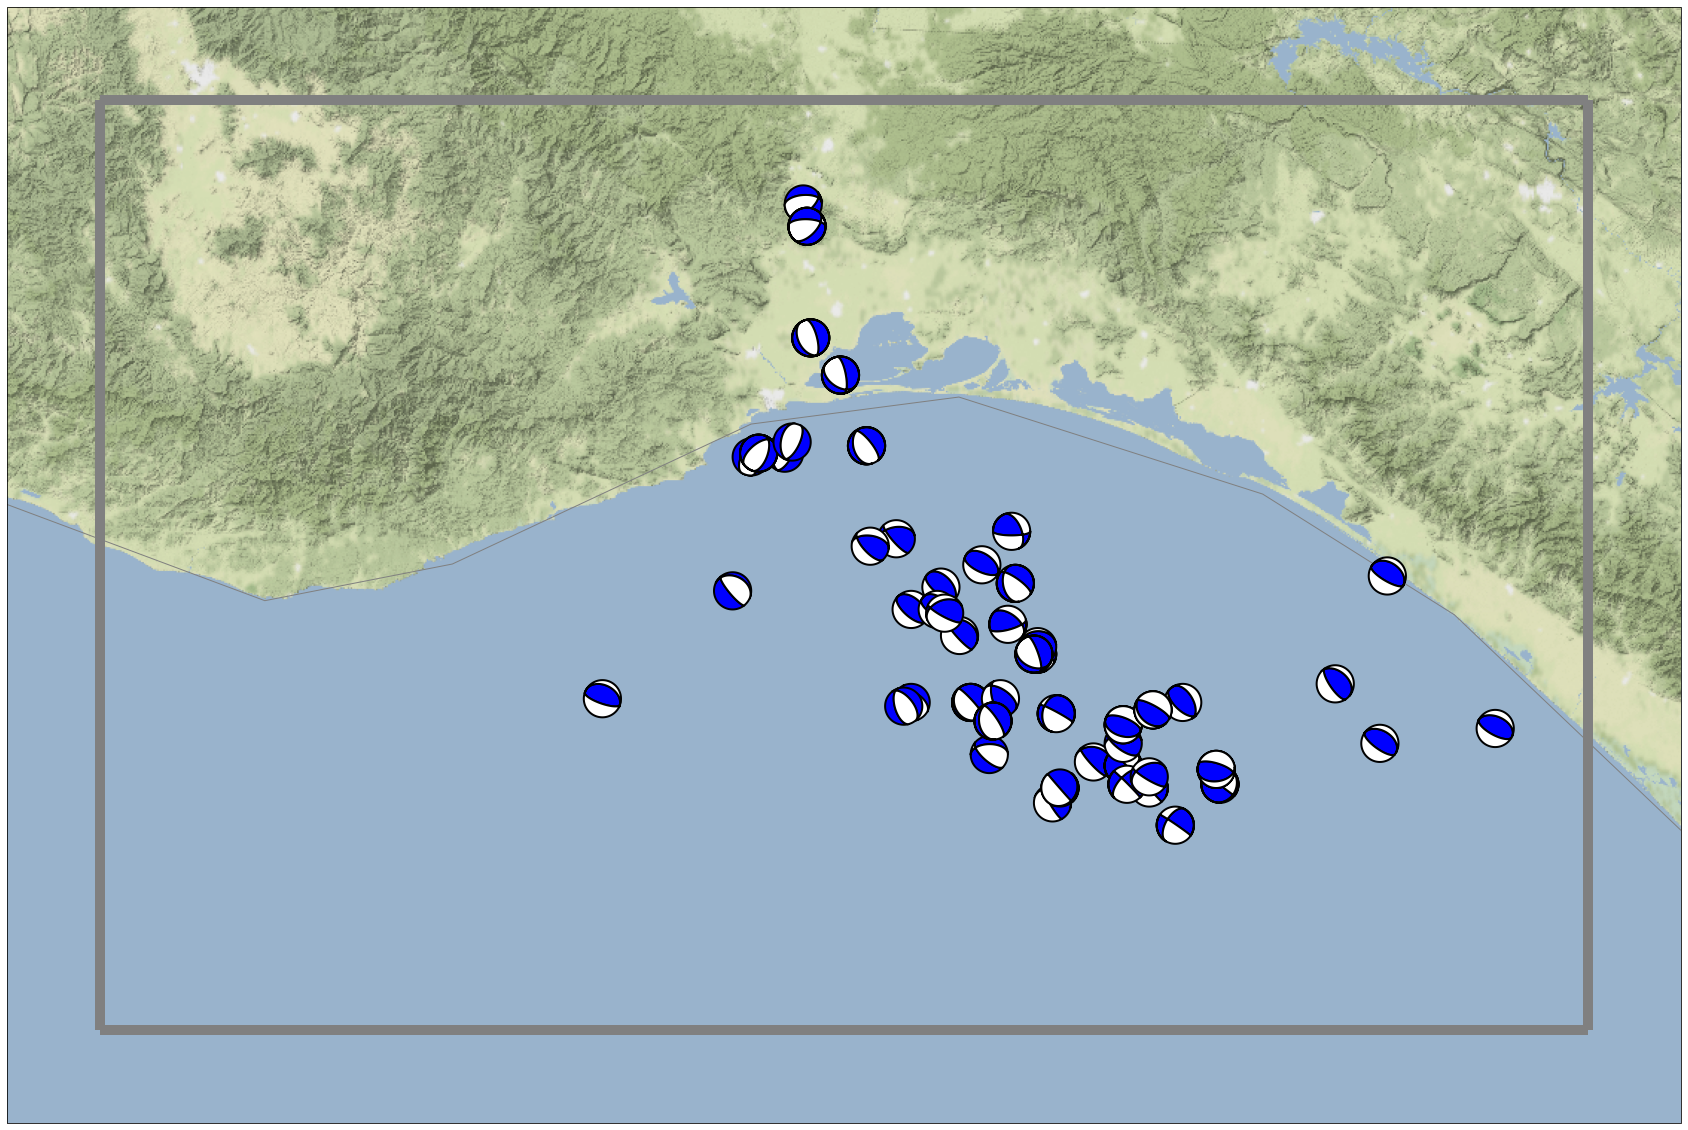

In [5]:
# Dominio espacial
# Escribe tu código aquí. ~4 líneas
minlat = None
maxlat = None
minlon = None
maxlon = None


fig = plt.figure(figsize=(30,30))

#Inicializa la projección y los límites de mapa.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minlon-0.25, maxlon+0.25, minlat-0.25, maxlat+0.25], crs=ccrs.PlateCarree())

#Descarga las imagenes del terreno (Mayor zoom = más detalles).
# Escribe tu código aquí. Modifica la siguiente línea en caso de ser necesario
Zoom = 10
terrain = cimgt.Stamen(style = 'terrain-background',desired_tile_form='RGB')
ax.add_image(terrain, 10) 

#Dibuja lineas de costa y bordes internacionales.
ax.coastlines(resolution='110m', color='gray')   
states_provinces = cfeature.NaturalEarthFeature(
                    category='cultural',
                    name='admin_1_states_provinces_lines',
                    scale='110m',
                    facecolor='none')    
ax.add_feature(states_provinces, edgecolor='black', linewidth = 3)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=3)


#Añade un recuadro de la zona de estudio
ax.vlines(maxlon, ymin = minlat, ymax= maxlat, linewidth=10, color='gray')
ax.vlines(minlon, ymin = minlat, ymax= maxlat, linewidth=10, color='gray')
ax.hlines(minlat, xmin = minlon, xmax=maxlon, linewidth=10, color='gray')
ax.hlines(maxlat, xmin = minlon, xmax=maxlon, linewidth=10, color='gray')

#Dibuja las pelotas de plajya
for index, row in sismos.iterrows():
    mt = [row.str1, row.dip1, row.rake1]
    beachball = beach(mt, xy = (row.lon, row.lat), width = 0.1)
    ax.add_collection(beachball)
    

plt.xlabel('Longitud (˚E)', fontsize = 50)
plt.ylabel('Latitud (˚N)', fontsize = 50)
plt.show()